# Submission 1 Machine Learning Terapan - Bagus Angkasawan Sumantri Putra

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


**Penjelasan:** Meng-import semua library yang dibutuhkan untuk analisis data dan pemodelan machine learning. Pandas digunakan untuk manipulasi data, NumPy untuk operasi numerik, Matplotlib dan Seaborn untuk visualisasi, dan Scikit-learn untuk algoritma machine learning dan evaluasi model.

## Membaca Data

In [ ]:
df = pd.read_csv("obesity_data.csv")
df.head()


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


**Penjelasan:** Membaca data dari file CSV "obesity_data.csv" menggunakan Pandas dan menyimpannya dalam DataFrame bernama df. df.head() menampilkan 5 baris pertama data, yang menunjukkan kolom-kolom seperti 'Gender', 'Age', 'Height', 'Weight', dan 'BMI', serta beberapa kolom lainnya yang berhubungan dengan kebiasaan dan kondisi fisik individu.

## Informasi Data

In [ ]:
print("Jumlah baris dan kolom:", df.shape)
df.info()

Jumlah baris dan kolom: (1000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


**Penjelasan:** Menampilkan informasi dasar tentang DataFrame. df.shape menunjukkan data memiliki 1000 baris dan 7 kolom. df.info() memberikan informasi detail seperti tipe data setiap kolom (misalnya, float64, int64, object), jumlah data non-null di setiap kolom (semuanya 1000, menunjukkan tidak ada missing values), dan penggunaan memori.

In [ ]:
df.isnull().sum()


,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
PhysicalActivityLevel,0
ObesityCategory,0


**Penjelasan:** Mengecek apakah ada data yang hilang (missing values) di setiap kolom DataFrame. Output menunjukkan bahwa semua kolom memiliki 0 missing values, yang berarti dataset lengkap.

In [ ]:
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")

Jumlah baris duplikat: 0


**Penjelasan:** Mengecek dan menghitung jumlah baris duplikat dalam dataset. Output menunjukkan tidak ada baris yang teridentifikasi sebagai duplikat.

In [ ]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)].index.tolist()
    return outliers

outliers_age = detect_outliers_iqr(df['Age'])
outliers_height = detect_outliers_iqr(df['Height'])
outliers_weight = detect_outliers_iqr(df['Weight'])
outliers_bmi = detect_outliers_iqr(df['BMI'])

all_outliers = list(set(outliers_age + outliers_height + outliers_weight + outliers_bmi))

print(f"Jumlah outlier: {len(all_outliers)}")

Jumlah outlier: 26


**Penjelasan:** Mendeteksi outlier pada fitur numerik ('Age', 'Height', 'Weight', 'BMI') menggunakan metode Interquartile Range (IQR). Ditemukan 26 outlier, terutama pada fitur berat badan (Weight). Meskipun demikian, outlier ini masih dalam batas wajar dan tidak dibuang karena tetap merepresentasikan populasi obesitas dalam dataset.

## Visualisasi Data

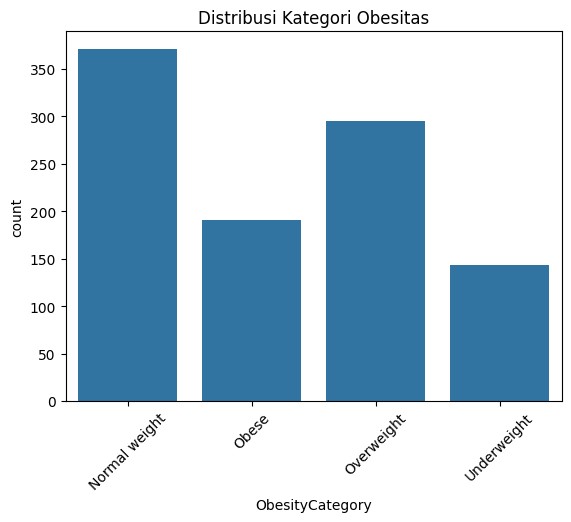

In [ ]:
sns.countplot(x='ObesityCategory', data=df)
plt.title("Distribusi Kategori Obesitas")
plt.xticks(rotation=45)
plt.show()


**Penjelasan:** Membuat plot batang (countplot) untuk memvisualisasikan distribusi kategori obesitas dalam dataset. Dari plot, terlihat bahwa kategori 'Normal weight' dan 'Overweight' memiliki jumlah data yang paling banyak, sedangkan kategori 'Underweight' memiliki jumlah data yang paling sedikit. Ini mengindikasikan bahwa dataset mungkin sedikit tidak seimbang.

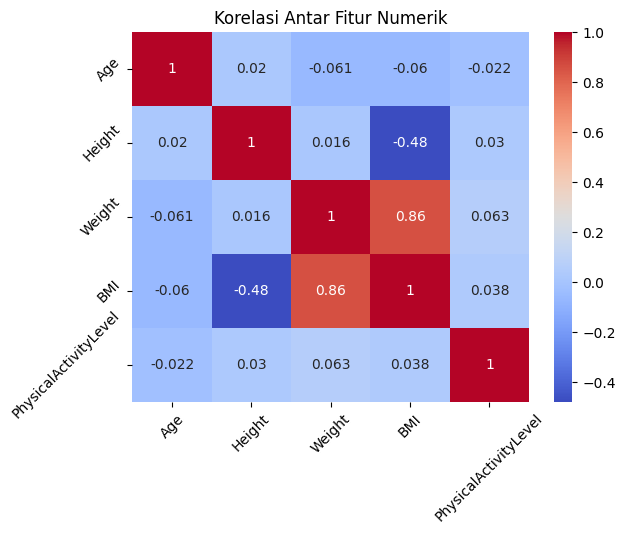

In [ ]:
df_corr = df.drop(columns=['Gender', 'ObesityCategory']).corr()

sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Numerik")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


**Penjelasan:** Menghitung dan memvisualisasikan korelasi antar fitur numerik menggunakan heatmap. Dari heatmap, terlihat bahwa ada korelasi positif yang kuat antara 'Weight' dan 'BMI', yang logis karena BMI dihitung berdasarkan berat badan dan tinggi badan. Beberapa fitur lain juga menunjukkan korelasi, meskipun tidak sekuat 'Weight' dan 'BMI'.

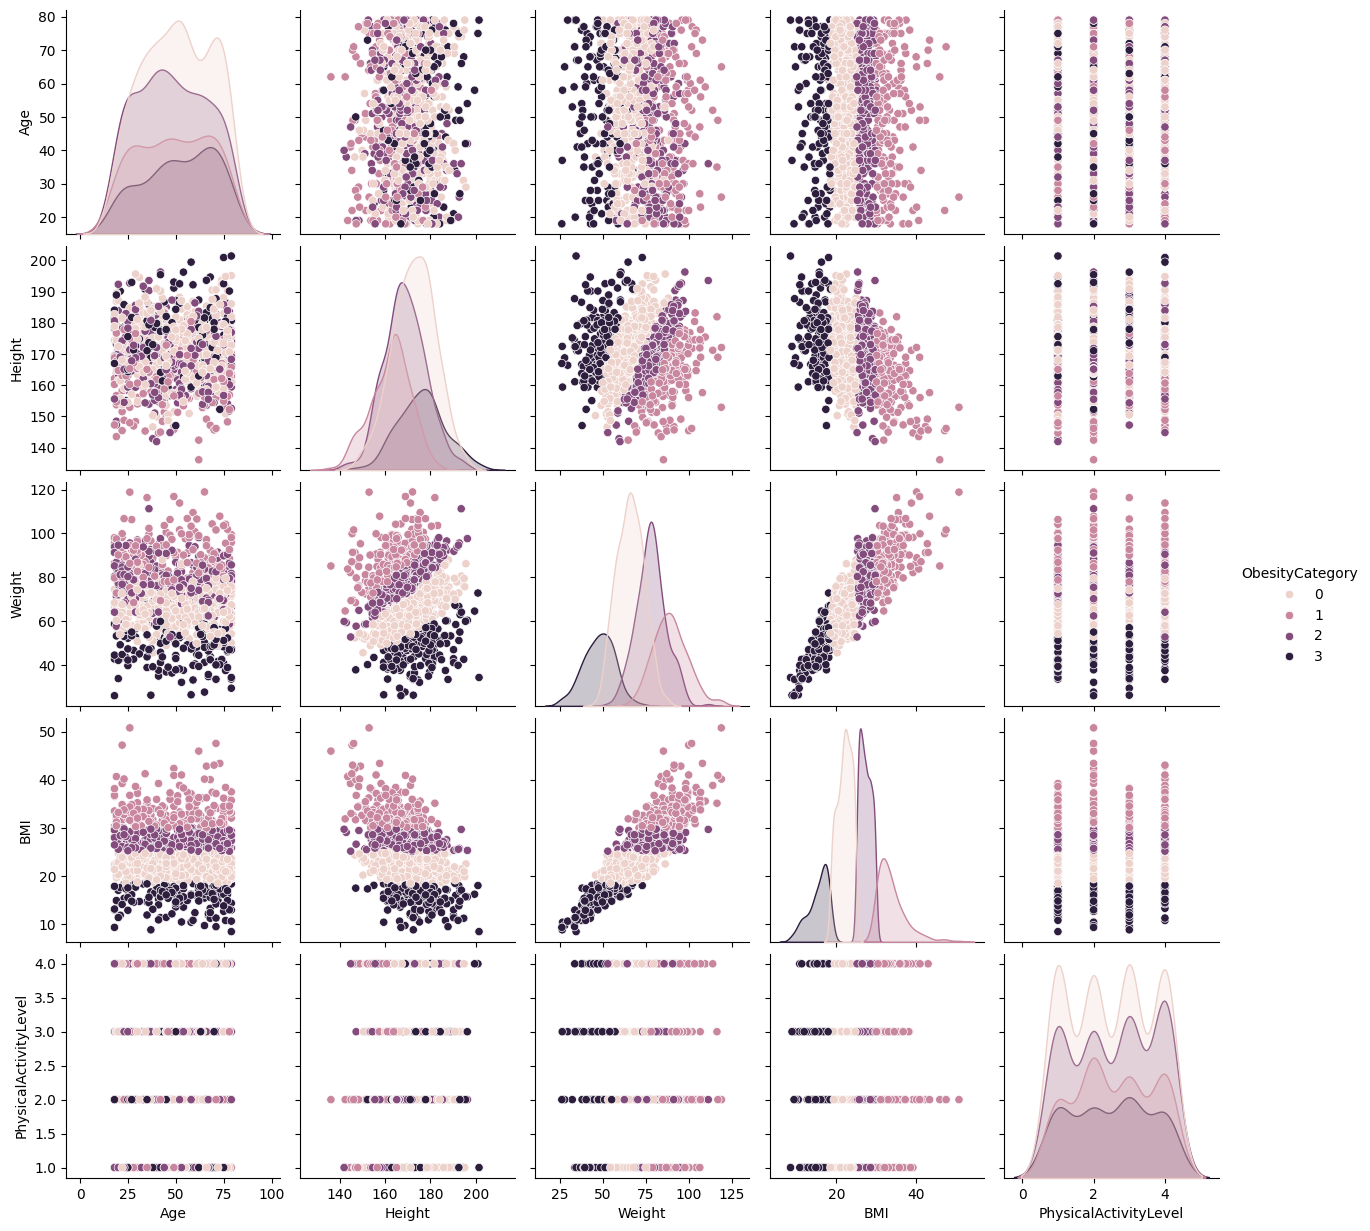

In [ ]:
sns.pairplot(df, vars=['Age', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel'], hue='ObesityCategory')
plt.show()


**Penjelasan:** Membuat pair plot untuk memvisualisasikan hubungan antara beberapa fitur numerik dan kategori obesitas. Dari plot, kita bisa melihat bagaimana fitur-fitur seperti 'Age', 'Height', 'Weight', 'BMI', dan 'PhysicalActivityLevel' bervariasi di setiap kategori obesitas. Misalnya, terlihat bahwa individu dengan 'Weight' dan 'BMI' yang lebih tinggi cenderung berada di kategori obesitas yang lebih tinggi.

## Preprocessing Data

In [ ]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_target = LabelEncoder()
df['ObesityCategory'] = le_target.fit_transform(df['ObesityCategory'])

X = df.drop('ObesityCategory', axis=1)
y = df['ObesityCategory']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


**Penjelasan:** Melakukan preprocessing data, termasuk mengubah data kategorikal menjadi numerik menggunakan Label Encoding, memisahkan fitur dan target, standarisasi fitur numerik, dan membagi data menjadi data latih dan data uji.

## Modeling (Pemodelan)

In [ ]:
# Model 1: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model 3: SVM
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


**Penjelasan:** Melatih tiga model machine learning: Logistic Regression, Random Forest, dan SVM. Data latih digunakan untuk melatih model, dan predict() digunakan untuk membuat prediksi pada data uji.

## Evaluasi Model

In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"=== {model_name} ===")
    print(classification_report(y_test, y_pred, target_names=le_target.classes_))
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")


=== Logistic Regression ===
               precision    recall  f1-score   support

Normal weight       0.94      1.00      0.97        74
        Obese       1.00      0.97      0.99        38
   Overweight       0.98      0.97      0.97        59
  Underweight       1.00      0.90      0.95        29

     accuracy                           0.97       200
    macro avg       0.98      0.96      0.97       200
 weighted avg       0.97      0.97      0.97       200

Akurasi: 0.97
Confusion Matrix:
[[74  0  0  0]
 [ 0 37  1  0]
 [ 2  0 57  0]
 [ 3  0  0 26]]


=== Random Forest ===
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00        74
        Obese       1.00      0.97      0.99        38
   Overweight       0.98      1.00      0.99        59
  Underweight       1.00      1.00      1.00        29

     accuracy                           0.99       200
    macro avg       1.00      0.99      0.99       200
 weighted avg       1.00 

**Penjelasan:** Mengevaluasi performa setiap model menggunakan classification report, akurasi, dan confusion matrix. Fungsi evaluate_model() didefinisikan untuk menampilkan hasil evaluasi. Dari hasil evaluasi, terlihat bahwa model Random Forest memiliki performa yang paling baik, dengan akurasi tertinggi dan skor F1-score yang baik di semua kategori.